In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [6]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))



In [7]:
df = pd.read_csv("labeled_data.csv")
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [8]:
df['labels'] = df ['labels'].map({0:"Hate Speech Detected", 1:"Offensive Language Detected", 2:"No Hate and Offensive Speech"})
df.head()                             

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language Detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language Detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language Detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language Detected


In [9]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\']', '', text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\n', '', text)
    text=re.sub('\w*\d\w*', '', text)
    text=[word for word in text.split()if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split()]
    text=" ".join(text)
    return text
df['tweet']= df['tweet'].apply(clean)
df.head()


,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,No Hate and Offensive Speech
1,rt boy dat coldtyga dwn bad cuffin dat hoe place,Offensive Language Detected
2,rt urkindofbrand dawg rt ever fuck bitch start...,Offensive Language Detected
3,rt cganderson vivabas look like tranni,Offensive Language Detected
4,rt shenikarobert shit hear might true might fa...,Offensive Language Detected


In [10]:
ds = pd.read_csv("val.csv")
ds.head()

,tweet,labels
0,haya,2
1,ndo ujue shetani angekuwa na nguvu asingepigwa...,2
2,umemaliza mjadala unaoaje mwanamke alikuzidi a...,2
3,kaza manna unamgegeda huyuo,2
4,huyu mbona kaisha sasa,2


In [11]:
ds['labels'] = ds ['labels'].map({0:"Hate Speech Detected", 1:"Offensive Language Detected", 2:"No Hate and Offensive Speech"})
ds.head()

,tweet,labels
0,haya,No Hate and Offensive Speech
1,ndo ujue shetani angekuwa na nguvu asingepigwa...,No Hate and Offensive Speech
2,umemaliza mjadala unaoaje mwanamke alikuzidi a...,No Hate and Offensive Speech
3,kaza manna unamgegeda huyuo,No Hate and Offensive Speech
4,huyu mbona kaisha sasa,No Hate and Offensive Speech


In [12]:
merged_datasets = pd.concat([df,ds])
merged_datasets.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,No Hate and Offensive Speech
1,rt boy dat coldtyga dwn bad cuffin dat hoe place,Offensive Language Detected
2,rt urkindofbrand dawg rt ever fuck bitch start...,Offensive Language Detected
3,rt cganderson vivabas look like tranni,Offensive Language Detected
4,rt shenikarobert shit hear might true might fa...,Offensive Language Detected


In [13]:
x = np.array(df["tweet"])
y = np.array(df["labels"])
cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state= 42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
test_data = "You are bad I don't like you"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))

['Offensive Language Detected']


In [15]:
y_pred = clf.predict(X_test)
y_pred

array(['Offensive Language Detected', 'Offensive Language Detected',
       'Offensive Language Detected', ..., 'Offensive Language Detected',
       'Offensive Language Detected', 'Offensive Language Detected'],
      dtype=object)

In [16]:
clf.score(X_test,y_test)

0.8771243428291967

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred, labels=clf.classes_)
cm

array([[ 155,   37,  273],
       [  34, 1138,  207],
       [ 236,  218, 5881]], dtype=int64)

<Axes: >

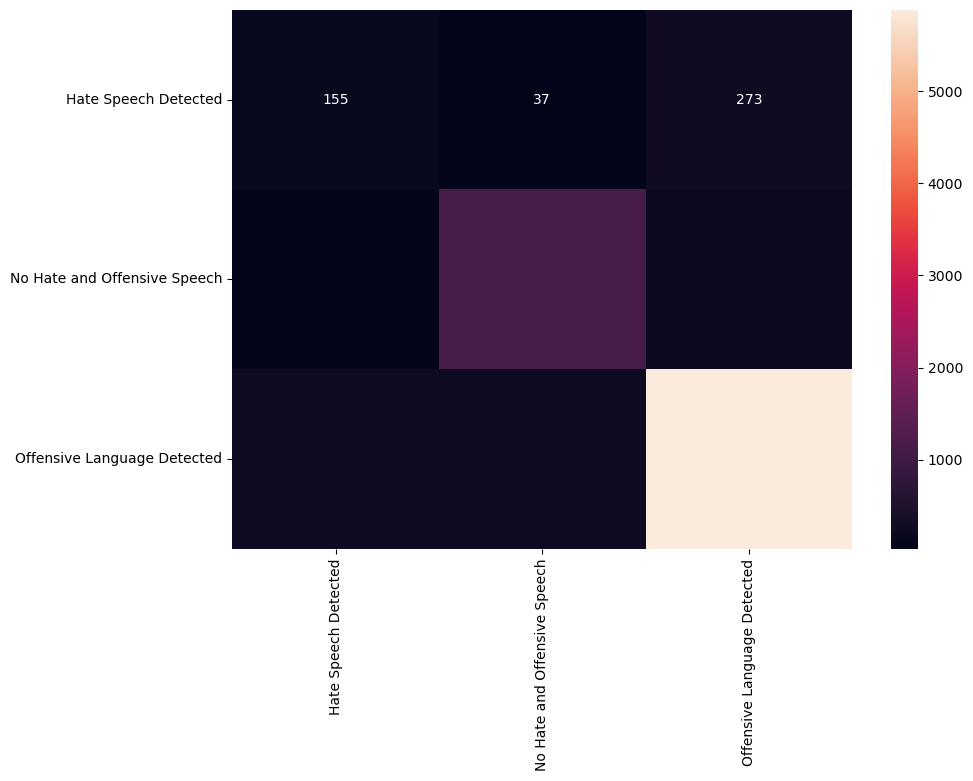

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=clf.classes_, yticklabels=clf.classes_)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.36      0.33      0.35       465
No Hate and Offensive Speech       0.82      0.83      0.82      1379
 Offensive Language Detected       0.92      0.93      0.93      6335

                    accuracy                           0.88      8179
                   macro avg       0.70      0.70      0.70      8179
                weighted avg       0.87      0.88      0.88      8179



In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'max_depth':[10,15], 'max_features':["sqrt","log2"]}
tree= DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = clf.predict(X_test)
y_pred

array(['Offensive Language Detected', 'Offensive Language Detected',
       'Offensive Language Detected', ..., 'Offensive Language Detected',
       'Offensive Language Detected', 'Offensive Language Detected'],
      dtype=object)

In [25]:
import pickle

In [26]:
with open('hate.pkl' , 'wb') as file:
    pickle.dump(clf, file)

In [27]:
print(classification_report(y_test,y_pred))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.36      0.33      0.34       465
No Hate and Offensive Speech       0.81      0.81      0.81      1379
 Offensive Language Detected       0.92      0.93      0.92      6335

                    accuracy                           0.87      8179
                   macro avg       0.70      0.69      0.69      8179
                weighted avg       0.87      0.87      0.87      8179

